In [8]:
import pandas as pd

import os
os.getcwd()
data_path = "data"

# Dosyaları listele
file_names = os.listdir(data_path)

# CSV dosyalarını yükle
dataframes = {}
for file in file_names:
    if file.endswith(".csv"):
        name = file.replace(".csv", "")
        df = pd.read_csv(os.path.join(data_path, file))
        dataframes[name] = df
        print(f"{name}: {df.shape}")

# Örnek: drivers.csv dosyasına erişmek için:
drivers_df = dataframes['drivers']
drivers_df.head()



circuits: (77, 9)
constructors: (212, 5)
constructor_results: (12625, 5)
constructor_standings: (13391, 7)
drivers: (861, 9)
driver_standings: (34863, 7)
lap_times: (589081, 6)
pit_stops: (11371, 7)
qualifying: (10494, 9)
races: (1125, 18)
results: (26759, 18)
seasons: (75, 2)
sprint_results: (360, 16)
status: (139, 2)


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


Kaç farklı sürücü var?

In [9]:
print("Toplam sürücü sayısı:", drivers_df.shape[0])
print("Farklı millet sayısı:", drivers_df['nationality'].nunique())
print("En çok temsil edilen 10 ülke:")
print(drivers_df['nationality'].value_counts().head(10))


Toplam sürücü sayısı: 861
Farklı millet sayısı: 43
En çok temsil edilen 10 ülke:
nationality
British          166
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Belgian           23
Swiss             23
South African     23
Name: count, dtype: int64


En yaşlı ve en genç sürücüler

In [10]:
drivers_df['dob'] = pd.to_datetime(drivers_df['dob'])
youngest = drivers_df.sort_values('dob', ascending=False).head(5)
oldest = drivers_df.sort_values('dob', ascending=True).head(5)

print("En genç 5 sürücü:")
print(youngest[['forename', 'surname', 'dob']])

print("\nEn yaşlı 5 sürücü:")
print(oldest[['forename', 'surname', 'dob']])


En genç 5 sürücü:
    forename    surname        dob
858   Oliver    Bearman 2005-05-08
859   Franco  Colapinto 2003-05-27
860     Jack     Doohan 2003-01-20
857     Liam     Lawson 2002-02-11
855    Oscar    Piastri 2001-04-06

En yaşlı 5 sürücü:
     forename    surname        dob
741  Philippe  Étancelin 1896-12-28
786     Luigi    Fagioli 1898-06-09
791  Clemente  Biondetti 1898-08-18
703    Arthur      Legat 1898-11-01
589     Louis     Chiron 1899-08-03


Doğum yılına göre dağılım (histogram)

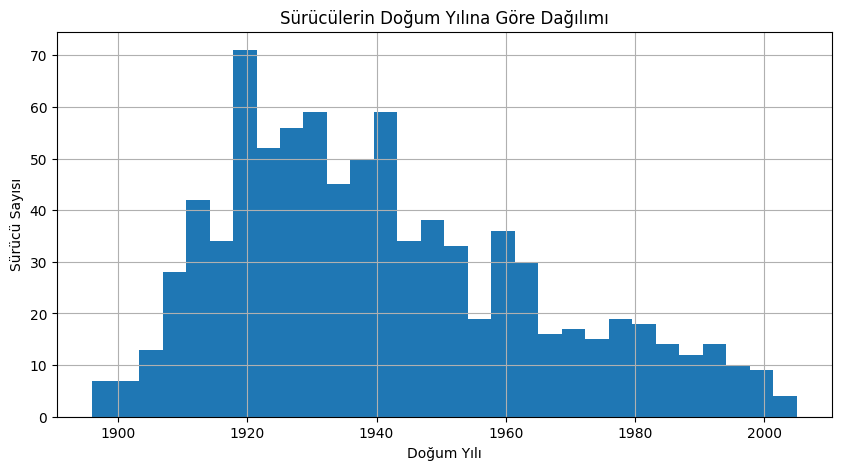

In [11]:
drivers_df['birth_year'] = drivers_df['dob'].dt.year
drivers_df['birth_year'].hist(bins=30, figsize=(10,5))
plt.title("Sürücülerin Doğum Yılına Göre Dağılımı")
plt.xlabel("Doğum Yılı")
plt.ylabel("Sürücü Sayısı")
plt.show()


Hedef:
Her sürücünün:

Kaç yarışa katıldığını

Kaç kere 1., 2. veya 3. olduğunu

Toplam puanını görmek



In [12]:
# results.csv + drivers.csv birleştirme

In [13]:
# DataFrame'leri al
results_df = dataframes['results']
drivers_df = dataframes['drivers']

# Birleştirme (join) işlemi: driverId üzerinden
merged_df = results_df.merge(drivers_df, on='driverId', how='left')

# Tam ad sütunu oluşturalım
merged_df['full_name'] = merged_df['forename'] + ' ' + merged_df['surname']


Sürücü Bazlı Performans Analizi

In [15]:
# Kaç yarışa katıldı
race_counts = merged_df['full_name'].value_counts().head(10)

# Kaç 1.lik kazandı (positionOrder = 1)
wins = merged_df[merged_df['positionOrder'] == 1]['full_name'].value_counts().head(10)

# Toplam puanlar
total_points = merged_df.groupby('full_name')['points'].sum().sort_values(ascending=False).head(10)

# Sonuçları yazdır
print("🏎️ En çok yarışan 10 sürücü:\n", race_counts)
print("\n🥇 En çok 1.lik kazanan 10 sürücü:\n", wins)
print("\n⭐ En çok puan toplayan 10 sürücü:\n", total_points)


🏎️ En çok yarışan 10 sürücü:
 full_name
Fernando Alonso       404
Lewis Hamilton        356
Kimi Räikkönen        352
Rubens Barrichello    326
Jenson Button         309
Michael Schumacher    308
Sebastian Vettel      300
Sergio Pérez          283
Felipe Massa          271
Riccardo Patrese      257
Name: count, dtype: int64

🥇 En çok 1.lik kazanan 10 sürücü:
 full_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         63
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           41
Fernando Alonso        32
Nigel Mansell          31
Jackie Stewart         27
Niki Lauda             25
Name: count, dtype: int64

⭐ En çok puan toplayan 10 sürücü:
 full_name
Lewis Hamilton        4820.5
Sebastian Vettel      3098.0
Max Verstappen        2912.5
Fernando Alonso       2329.0
Kimi Räikkönen        1873.0
Valtteri Bottas       1788.0
Nico Rosberg          1594.5
Sergio Pérez          1585.0
Michael Schumacher    1566.0
Charles Leclerc       1363.0
Name: 

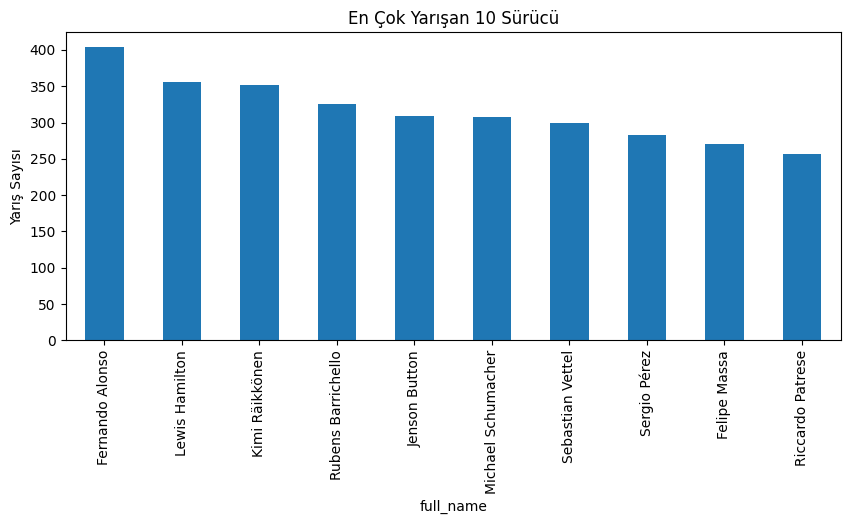

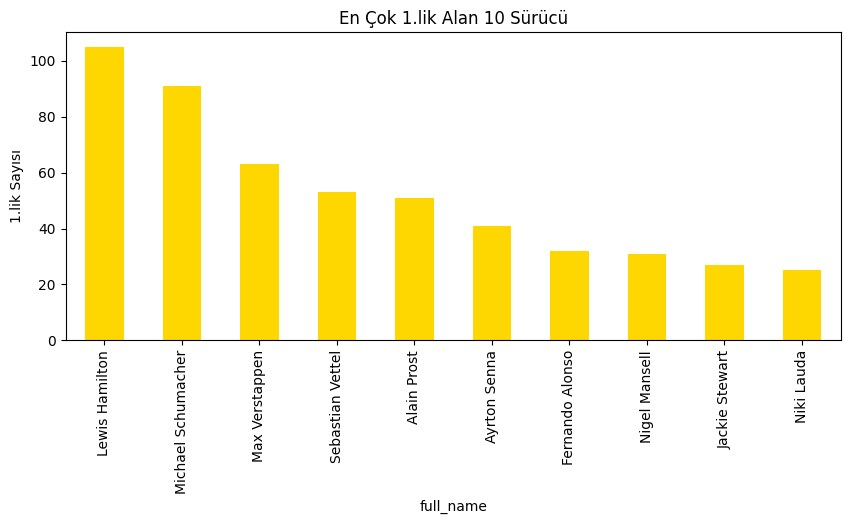

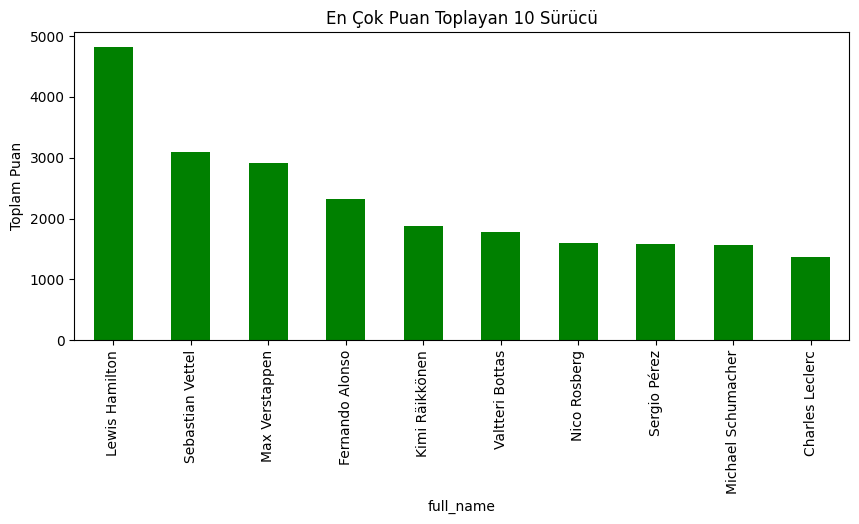

In [16]:
# Görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
race_counts.plot(kind='bar', title='En Çok Yarışan 10 Sürücü')
plt.ylabel("Yarış Sayısı")
plt.show()

plt.figure(figsize=(10,4))
wins.plot(kind='bar', color='gold', title='En Çok 1.lik Alan 10 Sürücü')
plt.ylabel("1.lik Sayısı")
plt.show()

plt.figure(figsize=(10,4))
total_points.plot(kind='bar', color='green', title='En Çok Puan Toplayan 10 Sürücü')
plt.ylabel("Toplam Puan")
plt.show()


Amaçlarımız:
Her sezonun şampiyon sürücüsünü bulmak

En çok şampiyon olan sürücüleri sıralamak

Zaman içinde sürücülerin performans değişimlerini analiz etmek

Görselleştirmelerle sonuçları sunmak



In [17]:
# Gerekli veri setlerini yükle ve birleştir
# Gerekli veriler
driver_standings_df = dataframes['driver_standings']
races_df = dataframes['races']
drivers_df = dataframes['drivers']

# raceId ile year'ı eşleştir
standings = driver_standings_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')

# Yıl + sürücü bazlı en yüksek toplam puanlı kaydı filtrele (position == 1)
season_champions = standings[standings['position'] == 1]

# Sürücü bilgilerini ekleyelim
season_champions = season_champions.merge(drivers_df[['driverId', 'forename', 'surname']], on='driverId', how='left')
season_champions['full_name'] = season_champions['forename'] + " " + season_champions['surname']

# Gerekli sütunları seç
season_champions = season_champions[['year', 'full_name', 'points']].sort_values('year')

# Göster
season_champions.head(10)


,year,full_name,points
797,1950,Nino Farina,9.0
798,1950,Nino Farina,9.0
794,1950,Nino Farina,9.0
795,1950,Juan Fangio,26.0
801,1950,Nino Farina,30.0
799,1950,Nino Farina,18.0
800,1950,Nino Farina,22.0
788,1951,Nino Farina,12.0
789,1951,Juan Fangio,15.0
786,1951,Juan Fangio,9.0


En Çok Şampiyon Olan Sürücüler

In [18]:
champion_counts = season_champions['full_name'].value_counts().head(10)
print("En çok şampiyon olan sürücüler:")
print(champion_counts)


En çok şampiyon olan sürücüler:
full_name
Lewis Hamilton        125
Michael Schumacher    121
Alain Prost            79
Max Verstappen         78
Sebastian Vettel       63
Fernando Alonso        52
Ayrton Senna           48
Niki Lauda             42
Juan Fangio            35
Jackie Stewart         33
Name: count, dtype: int64


Şampiyonluk Zaman Çizgisi (Line Chart)

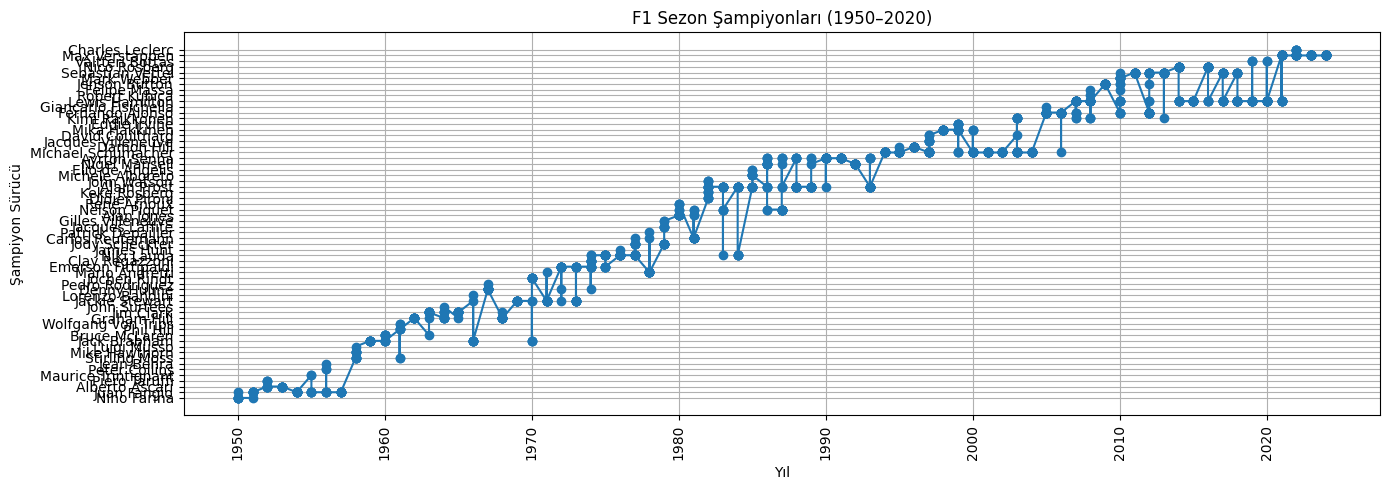

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(season_champions['year'], season_champions['full_name'], marker='o')
plt.title("F1 Sezon Şampiyonları (1950–2020)")
plt.xlabel("Yıl")
plt.ylabel("Şampiyon Sürücü")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


Sürücülere Göre Zaman İçinde Puan Değişimi

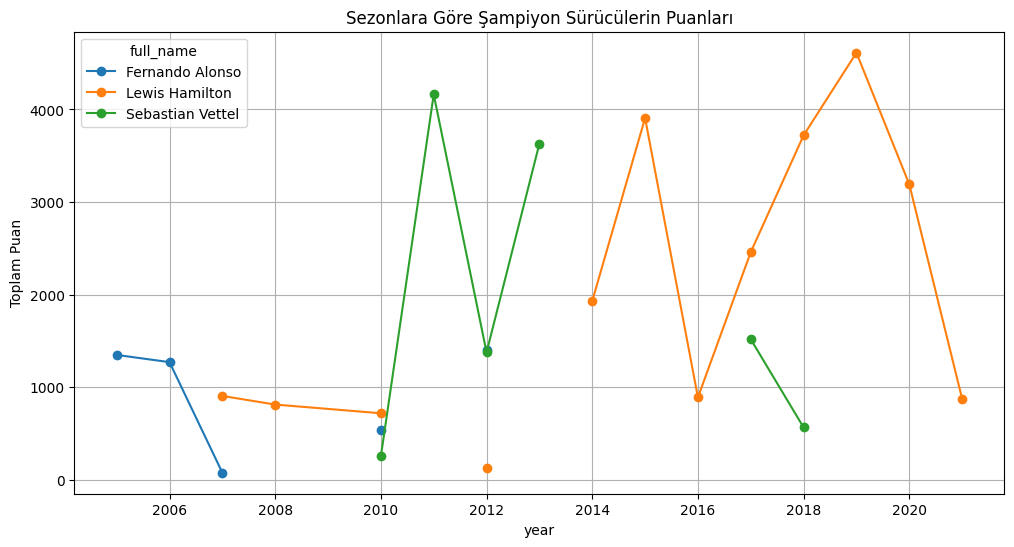

In [21]:
# Örnek: Hamilton, Vettel, Alonso için zaman serisi çizimi
selected_drivers = ['Lewis Hamilton', 'Sebastian Vettel', 'Fernando Alonso']
df_plot = standings.merge(drivers_df[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_plot['full_name'] = df_plot['forename'] + " " + df_plot['surname']

df_plot = df_plot[df_plot['full_name'].isin(selected_drivers)]

pivot = df_plot[df_plot['position'] == 1].groupby(['year', 'full_name'])['points'].sum().unstack()

pivot.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Sezonlara Göre Şampiyon Sürücülerin Puanları")
plt.ylabel("Toplam Puan")
plt.grid(True)
plt.show()


Hedeflerimiz:
Sezon sezon takım şampiyonlarını bulmak

En çok şampiyon olan takımları sıralamak

Takımların zaman içindeki puan performansını görselleştirmek

Bonus: Pistlerde takım başarısı analizi (istersen ekleriz)



Gerekli veri dosyaları:
constructor_standings.csv → Takımların sezon puan durumu

constructors.csv → Takım isimleri

races.csv → Yıllar için yarış bilgisi



In [ ]:
# Dosyaları al
constructor_standings = dataframes['constructor_standings']
constructors = dataframes['constructors']
races = dataframes['races']

# raceId üzerinden yıl bilgisi ekle
constructor_standings = constructor_standings.merge(races[['raceId', 'year']], on='raceId', how='left')

# constructor bilgilerini ekle
constructor_standings = constructor_standings.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')


In [24]:
# Sezonun Şampiyon Takımı

# Sadece şampiyon olan (position == 1) kayıtları al
champ_teams = constructor_standings[constructor_standings['position'] == 1]

# Yıl, takım adı, puan
champ_teams = champ_teams[['year', 'name', 'points']].sort_values('year')
champ_teams.head(10)


,year,name,points
9350,1958,Ferrari,20.0
9386,1958,Cooper,19.0
9382,1958,Cooper,16.0
9368,1958,Cooper,19.0
9303,1958,Ferrari,37.0
9320,1958,Ferrari,36.0
9280,1958,Vanwall,41.0
9389,1958,Cooper,8.0
9266,1958,Vanwall,46.0
9247,1958,Vanwall,48.0


In [25]:

# En Çok Şampiyonluk Alan Takımlar

top_champ_teams = champ_teams['name'].value_counts().head(10)
print("En çok şampiyon olan takımlar:")
print(top_champ_teams)



En çok şampiyon olan takımlar:
name
Ferrari          234
McLaren          173
Mercedes         145
Red Bull         124
Williams         114
Renault           46
Team Lotus        44
Benetton          29
Lotus-Climax      23
Cooper-Climax     20
Name: count, dtype: int64


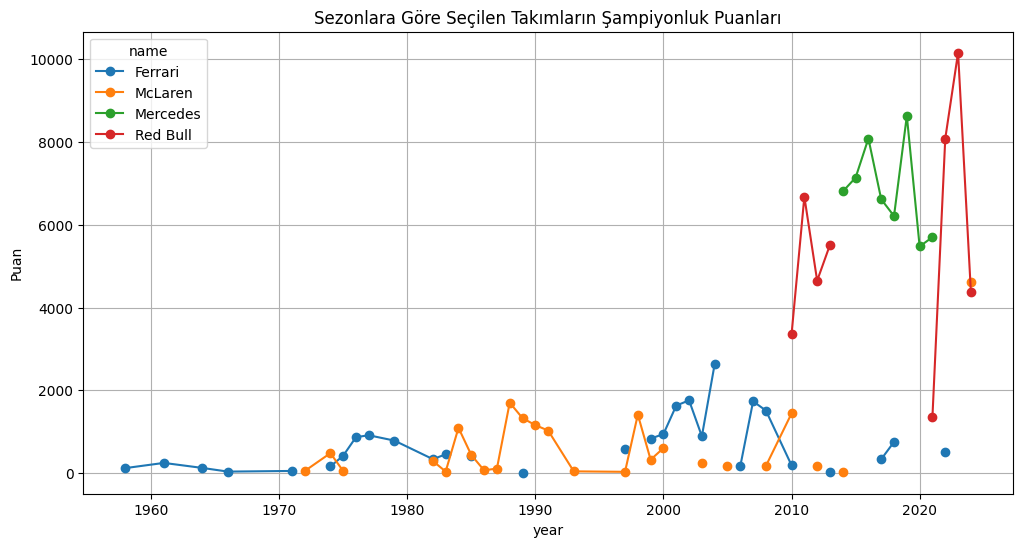

In [27]:
 # Zaman İçinde Takım Performansı

# Seçilen bazı takımların zaman içindeki puanlarını çizdirelim
selected_teams = ['Mercedes', 'Ferrari', 'Red Bull', 'McLaren']
df_plot = constructor_standings[constructor_standings['name'].isin(selected_teams) & (constructor_standings['position'] == 1)]

pivot = df_plot.groupby(['year', 'name'])['points'].sum().unstack()

pivot.plot(figsize=(12,6), marker='o')
plt.title("Sezonlara Göre Seçilen Takımların Şampiyonluk Puanları")
plt.ylabel("Puan")
plt.grid(True)
plt.show()


Bu analizle:

Sezon şampiyonlarını öğrendik

Ferrari vs Mercedes gibi kıyaslamalar yaptık

Bir takımın bir yarışta alacağı puanı tahmin eden bir regresyon modeli kurmak.
Böylece takım + pist + yıl gibi bilgileri vererek puan tahmini yapabileceğiz.

In [30]:
# Veriyi hazırlayalım
# Verileri al
constructor_results = dataframes['constructor_results']
constructors = dataframes['constructors']
races = dataframes['races']

# Yarış yıl bilgisiyle birleştir
df = constructor_results.merge(races[['raceId', 'year', 'circuitId']], on='raceId', how='left')
df = df.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Gerekli sütunlar
df = df[['raceId', 'constructorId', 'name', 'points', 'year', 'circuitId']]

# Null varsa silelim
df = df.dropna()

# Kontrol
df.head()


,raceId,constructorId,name,points,year,circuitId
0,18,1,McLaren,14.0,2008,1
1,18,2,BMW Sauber,8.0,2008,1
2,18,3,Williams,9.0,2008,1
3,18,4,Renault,5.0,2008,1
4,18,5,Toro Rosso,2.0,2008,1


In [31]:
# Feature Engineering (model girdi hazırlığı)
# Takım adı ve pist ID kategorik → sayısal hale getir (Label Encoding)
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
le_circuit = LabelEncoder()

df['team_encoded'] = le_team.fit_transform(df['name'])
df['circuit_encoded'] = le_circuit.fit_transform(df['circuitId'])

# Model girdileri
X = df[['year', 'team_encoded', 'circuit_encoded']]
y = df['points']



In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))


RMSE: 4.4237502983947135
R²: 0.6549762786502118


In [35]:
import joblib
joblib.dump(model, 'team_points_predictor.pkl')
joblib.dump(le_team, 'team_encoder.pkl')
joblib.dump(le_circuit, 'circuit_encoder.pkl')


['circuit_encoder.pkl']

In [36]:
import joblib

joblib.dump(model, 'team_points_predictor.pkl')
joblib.dump(le_team, 'team_encoder.pkl')
joblib.dump(le_circuit, 'circuit_encoder.pkl')

print("Model ve etiketleyiciler kaydedildi.")


Model ve etiketleyiciler kaydedildi.
